<center><h1><center>EasyVisa Project </center>
<center><h2><center>prepared by: Melissa Hills</center>
<center><img src='https://img.freepik.com/free-photo/visa-application-composition-with-american-flag_23-2149117788.jpg?t=st=1717617501~exp=1717621101~hmac=b9bbe1a7654b294804cfefdd603c7400e2e86e3c36caf8ca90627cd09a18375b&w=826' width="1000" height="600"></center>

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune the different models
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

## Reading the dataset

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the file
path = "/content/drive/MyDrive/UTAS/6Ensemble_Techniques/Project_Easy_VISA/EasyVisa.csv"
visadata = pd.read_csv(path)

# make a copy
data=visadata.copy()

## Data Overview

### Displaying the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
# find size of array
data.shape

(25480, 12)

* The dataset has 25480 rows and 12 columns of data

### Check the data types of the columns for the dataset.

In [ ]:
# get data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations -**
* There are no null values in the dataset.
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [ ]:
# get list of columns with object data type
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
# change data type for all objects to category
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
# recheck data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


* `we can see that the memory usage has decreased from 2.3 MB to 2.0 MB`, this technique is generally useful for bigger datasets.

### Check for duplicate rows

In [ ]:
# find total rows that are duplicates
data.duplicated().sum()

0

* There are no duplicate rows in the dataset

### Summary of the dataset

In [ ]:
# statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* The hiring companies range from -26 to 602,069 employees. We need to investigate this further.
* `prevailing_wage` has no insight because the label ranges from hourly, yearly, etc.

In [ ]:
# statistics for category columns
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


* `case_id` is an identifying variable and all unique values. Not useful for predictive modeling.
* Workers are coming from 6 continents.
* Bachelor's is the most prevalent type of employee education level.
* 58% of workers have job experience.
* 90% of workers receive their wages yearly.
* `case_status` is our target variable with ~67% of Visas were certified(approved).

**Let's look at the unique values of all the categories**

In [ ]:
# get columns that are categorical
cols_cat= data.select_dtypes(['category'])

In [ ]:
# for each categorical column, list unique values and total counts
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in case_id are :
case_id
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_

### Dropping columns

In [ ]:
# dropping columns which are not adding any valuable information
data.drop(['case_id'],axis=1,inplace=True)

### Encode case_status as 0 and 1's

In [ ]:
# Replace denied as a '0'. Replace certified with a '1'
data = data.replace({'case_status': {'Denied': 0, "Certified": 1}})
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


## Exploratory Data Analysis (EDA)

In [ ]:
# funtion to create a histogram and boxplot

def histogram_boxplot(data, feature, figsize=(15, 3), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=9)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 2))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 5))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariant Analysis

#### observations on `continent`

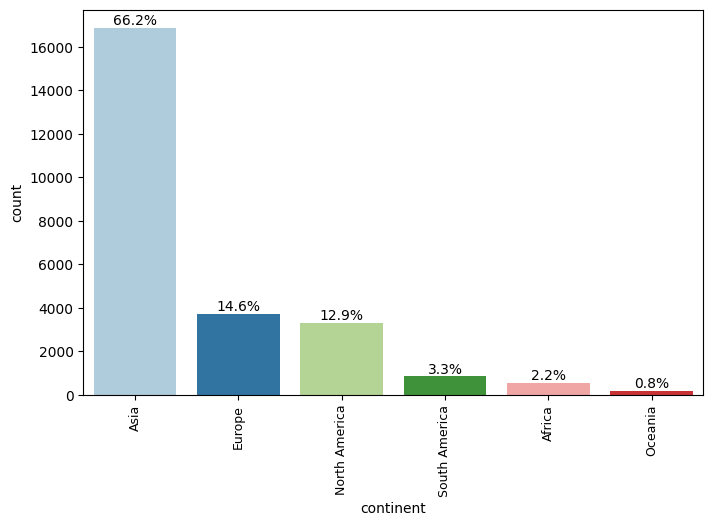

In [ ]:
labeled_barplot(data, 'continent', perc=True);

* Asia is the leading continent for US visa applications at 66.2%
* Africa and Oceania have the least applications.

#### observations on `education_of_employee`

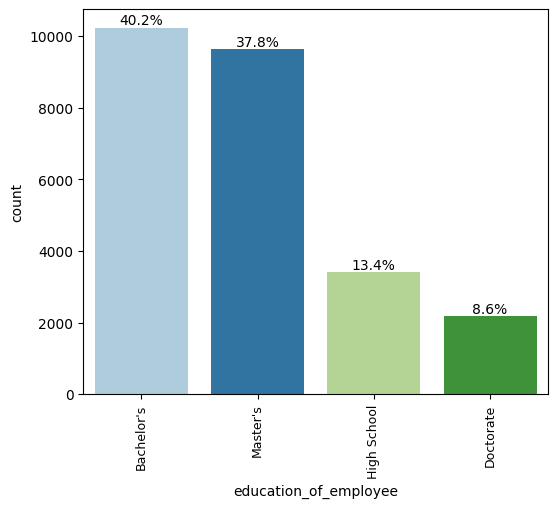

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True);

* Most applications are from employees with additional schooling. 86.6% have post-secondary education.
* Only 13.4% are individuals with only a high school education.

#### observations on `has_job_experience`


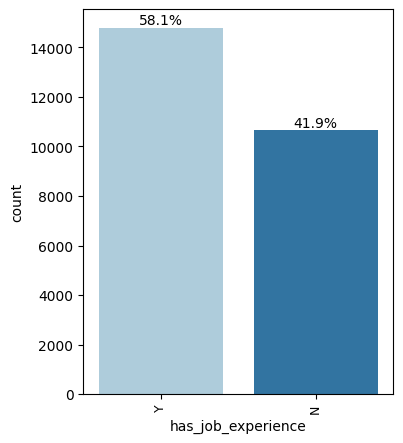

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True);

* 58% have job experience.

#### observations on `requires_job_training`

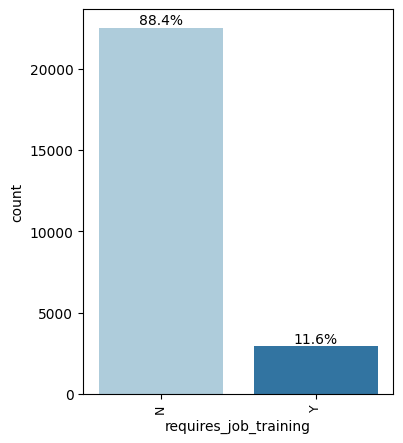

In [ ]:
labeled_barplot(data, 'requires_job_training', perc=True);

* Only 11.6% of applicants require job training.

#### observations on `no_of_employees`

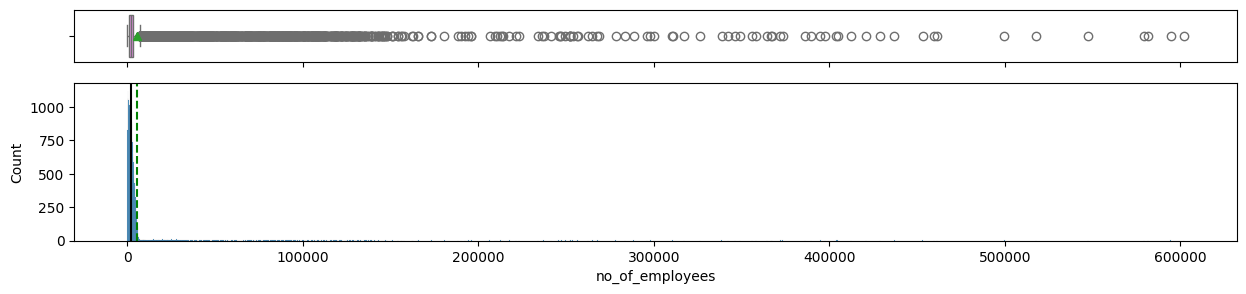

In [ ]:
histogram_boxplot(data, 'no_of_employees');

* The distribution of the number of employess at the company is very right skewed.
* Majority are companies with less than 6000 employees.

#### observations on `yr_of_estab`

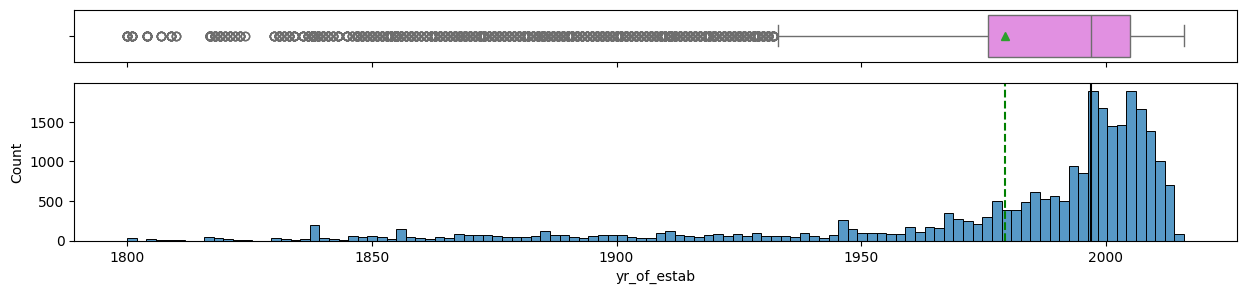

In [ ]:
histogram_boxplot(data, 'yr_of_estab');

* The year established is very left skewed.
* From the boxplot we see that 75% of companies were appx established between 1975-2005.

#### observations on `region_of_employment`

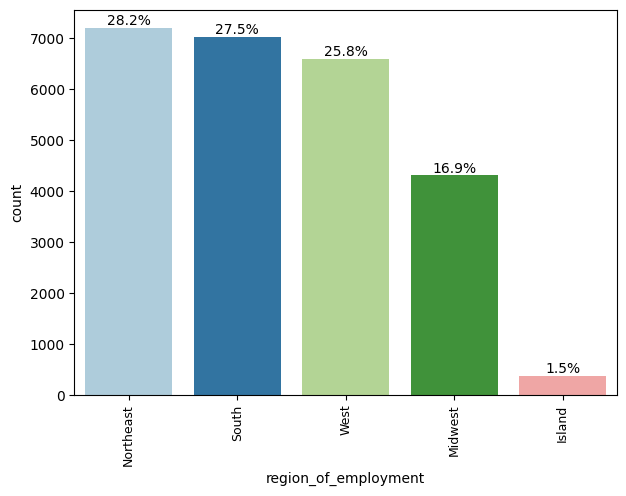

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True);

* There are 5 regions.
* The northeast and south region have similar number of applications.

#### observations on `prevailing_wage`

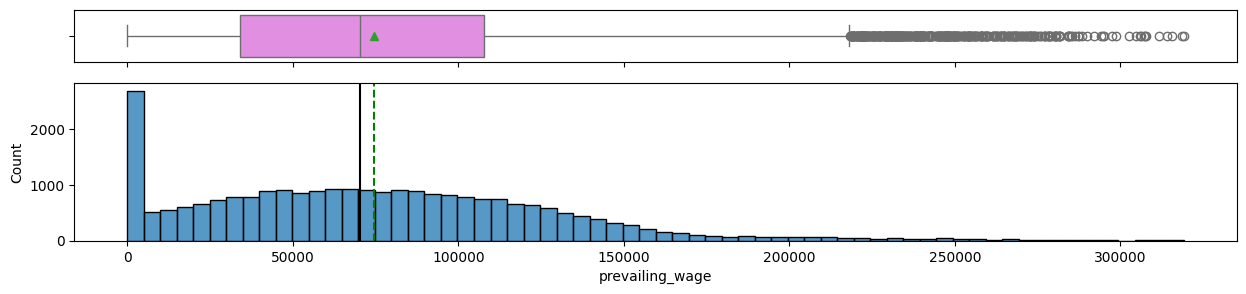

In [ ]:
histogram_boxplot(data, 'prevailing_wage');

* The prevailing wages of other employees has a wide range.
* Cannot interpret as the prevailing wages are reported with different time periods(hourly, weekly, etc).

**Convert `prevailing_wage` to same unit**

In [ ]:
# see types of unit of prevailing wage
data['unit_of_wage'].unique()

['Hour', 'Year', 'Week', 'Month']
Categories (4, object): ['Hour', 'Month', 'Week', 'Year']

In [ ]:
# conversions to get to yearly/salary
conversion_factor={'Hour': 2080, 'Week': 52, 'Month': 12, 'Year': 1}

# convert each row to yearly
data['prevailing_wage_yearly'] = data.apply(lambda row: row['prevailing_wage'] * conversion_factor[row['unit_of_wage']], axis=1)
data.head(20)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_yearly
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0,1231782.032
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1,83425.650
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0,122996.860
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0,83434.030
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1,149907.390
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,1,78252.140
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,1,53635.390
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,0,869917.984
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,1,74362.190
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,1,67514.760


In [ ]:
# drop unneeded columns
data.drop(['prevailing_wage'],axis=1,inplace=True)

#### observations on prevailing_wage_yearly

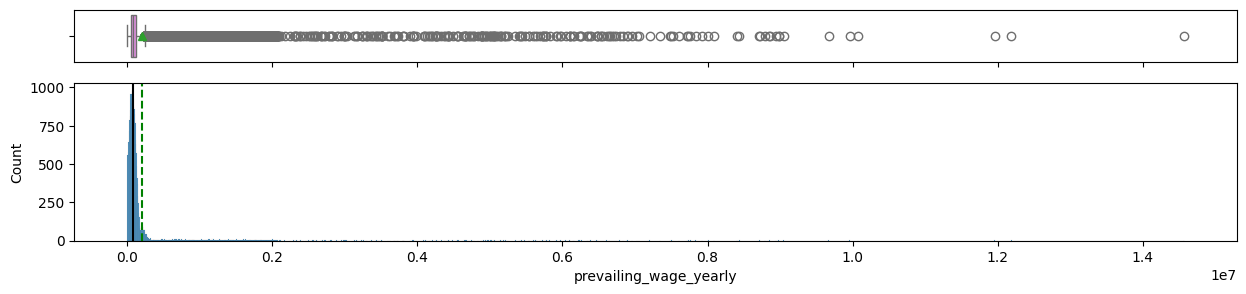

In [ ]:
histogram_boxplot(data, 'prevailing_wage_yearly');

In [ ]:
data['prevailing_wage_yearly'].describe()

count    2.548000e+04
mean     1.973912e+05
std      5.785917e+05
min      1.000000e+02
25%      4.710796e+04
50%      8.283946e+04
75%      1.248250e+05
max      1.456915e+07
Name: prevailing_wage_yearly, dtype: float64

* Prevailing wage yearly is very right skewed with many outliers.
* 75% of employees yearly wage is below 124000 USD.
* Need to investigate outliers.

#### observations on `unit_of_wage`

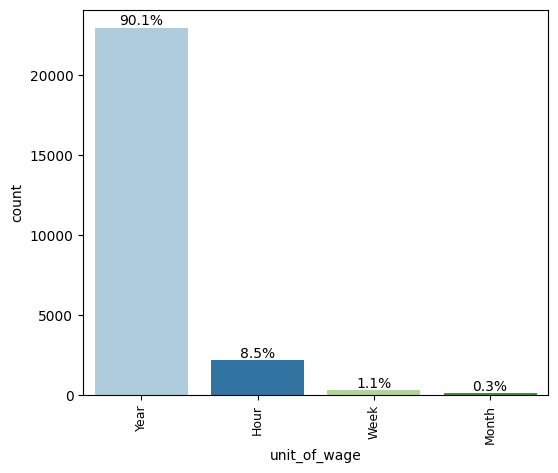

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True);

* The 90.1% of average wages for similar workers are paid yearly/salary.

#### observations on `full_time_position`

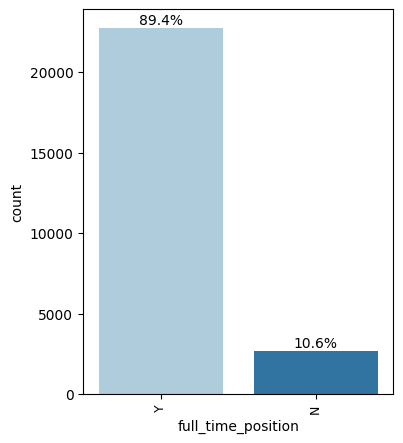

In [ ]:
labeled_barplot(data, 'full_time_position', perc=True);

* Majority of visa applications are for full-time employment.

#### observations on `case_status`


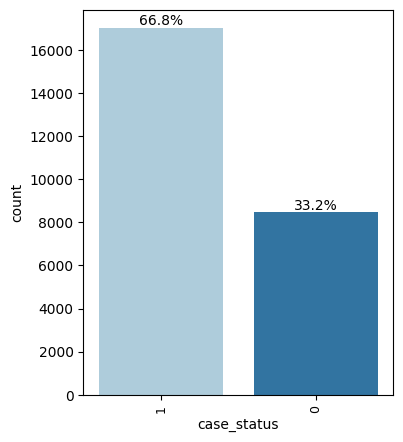

In [ ]:
labeled_barplot(data, 'case_status', perc=True);

* 2/3 of all visa applications are certified(approved).
* This is the dependent variable and it is not balanced.

### Bivariate Analysis

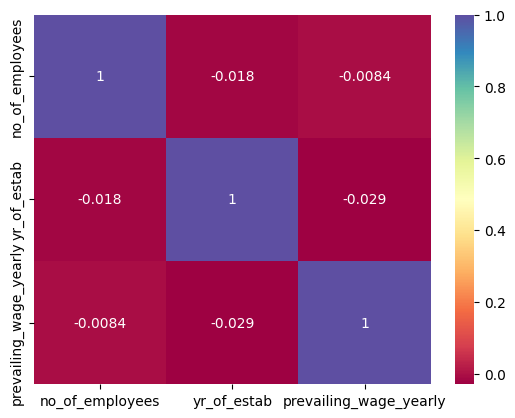

In [ ]:
# get correlation heatmap of numeric columns.
numeric_cols = data.select_dtypes(include=["int", "float"])
sns.heatmap(numeric_cols.corr(),annot=True,cmap='Spectral');

* No major correlation exists.

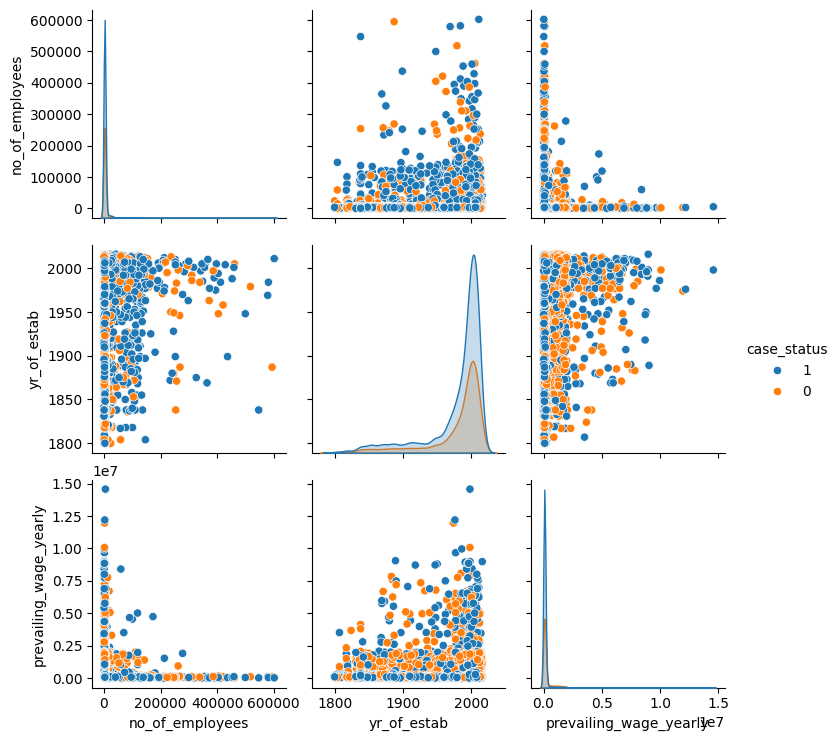

In [ ]:
# Pairplot with dependent varaible
sns.pairplot(data, hue='case_status');

* Again, no major correlations or trends.

### Has job exprience vs Requires job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


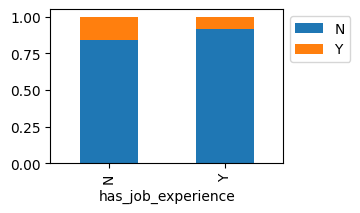

In [ ]:
stacked_barplot(data, 'has_job_experience', 'requires_job_training');

* For employees without job experience, double the individuals require more job training than those with job experience.

### Education of employee vs Has job experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


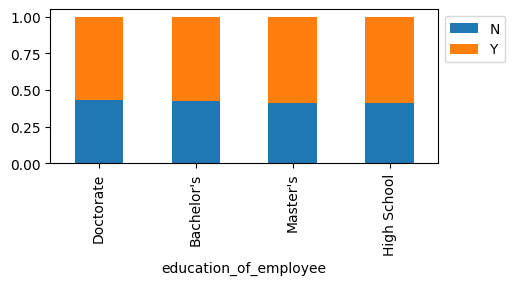

In [ ]:
stacked_barplot(data, 'education_of_employee', 'has_job_experience');

* Regardless of the education of employee, we see similar ~58% have job experience.

### Continent vs Unit of wage

unit_of_wage   Hour  Month  Week   Year    All
continent                                     
All            2157     89   272  22962  25480
Asia           1311     58   154  15338  16861
North America   495     17    75   2705   3292
Europe          140      7    17   3568   3732
Africa           36      3     8    504    551
Oceania          18      2     4    168    192
South America   157      2    14    679    852
------------------------------------------------------------------------------------------------------------------------


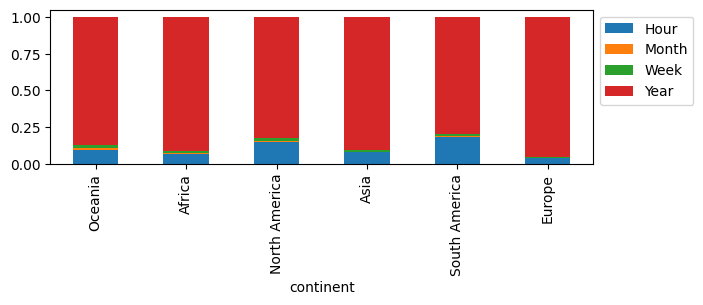

In [ ]:
stacked_barplot(data, 'continent', 'unit_of_wage');

* Yearly wage is the most popular for employees coming from all continents.
* 18% of employees from South America have the highest percent receiving hourly wages.

##### Number of employees vs Case status

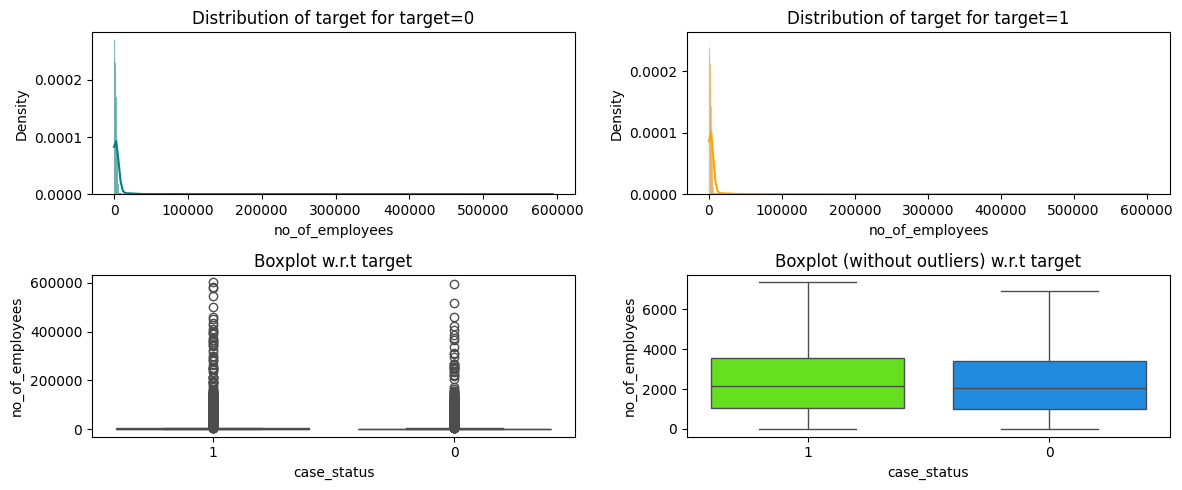

In [ ]:
distribution_plot_wrt_target(data, 'no_of_employees', 'case_status');

* There are many outliers for certified and denied.
* Without outliers, larger companies have a slightly higher amount of approved visa cases.

##### Year esablished vs Case status

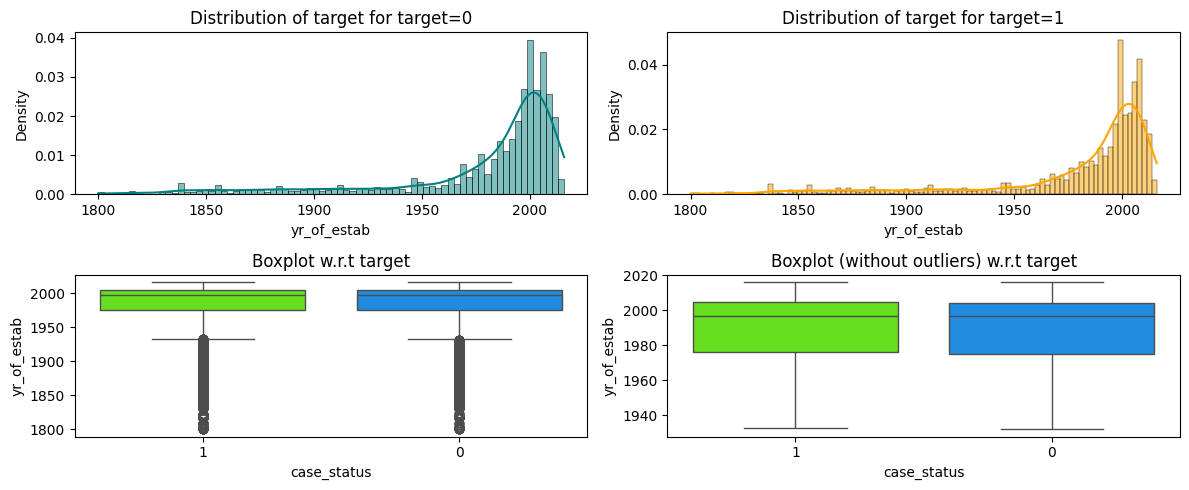

In [ ]:
distribution_plot_wrt_target(data, 'yr_of_estab', 'case_status');

* The year the company was established has not effect on case status.

##### Prevailing wage yearly vs Case status

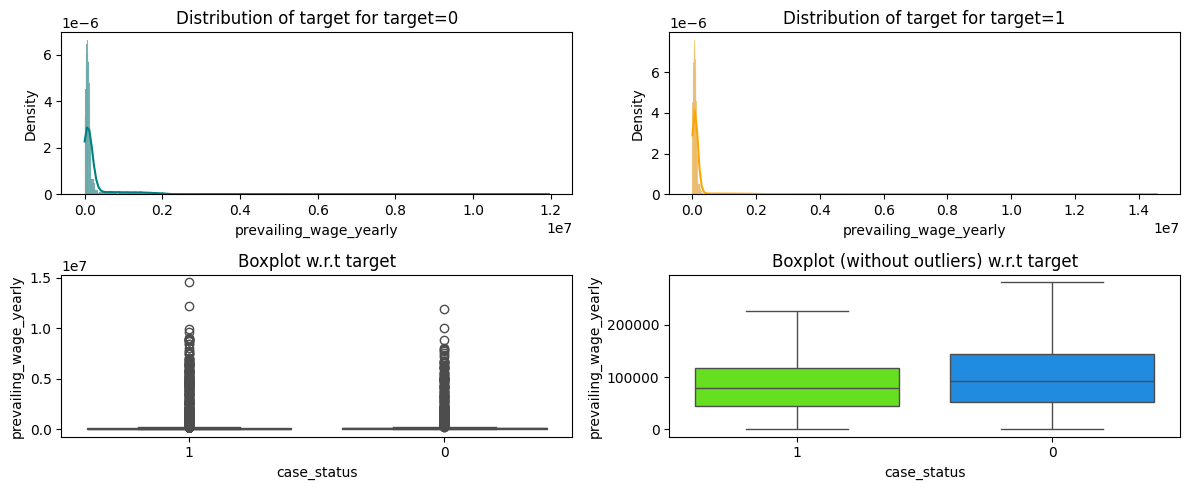

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage_yearly', 'case_status');

* A higher prevailing wage for similar workers have higher rate of having a visa denied.

##### Continent vs Case status

case_status        1     0    All
continent                        
All            17018  8462  25480
Asia           11012  5849  16861
North America   2037  1255   3292
Europe          2957   775   3732
South America    493   359    852
Africa           397   154    551
Oceania          122    70    192
------------------------------------------------------------------------------------------------------------------------


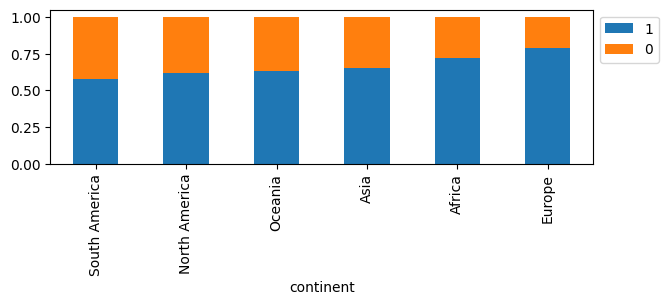

In [ ]:
stacked_barplot(data, 'continent', 'case_status');

* The most applications are from Asian, with 65% of Visas being certified.
* South America has the lowest percent of 57% of Visas being certified.

##### Education of employee vs Case status

case_status                1     0    All
education_of_employee                    
All                    17018  8462  25480
Bachelor's              6367  3867  10234
High School             1164  2256   3420
Master's                7575  2059   9634
Doctorate               1912   280   2192
------------------------------------------------------------------------------------------------------------------------


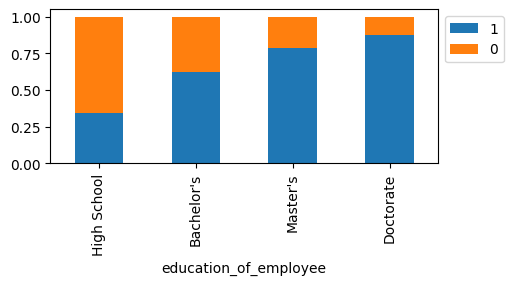

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status');

* High schoolers have the highest denial at ~66%.
* Doctorates have the least denial at ~12%.

##### Has job experience  vs Case status

case_status             1     0    All
has_job_experience                    
All                 17018  8462  25480
N                    5994  4684  10678
Y                   11024  3778  14802
------------------------------------------------------------------------------------------------------------------------


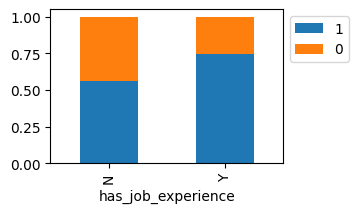

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status');

* Having job experience increases the chance of being certified.

##### Requires job training vs Case status

case_status                1     0    All
requires_job_training                    
All                    17018  8462  25480
N                      15012  7513  22525
Y                       2006   949   2955
------------------------------------------------------------------------------------------------------------------------


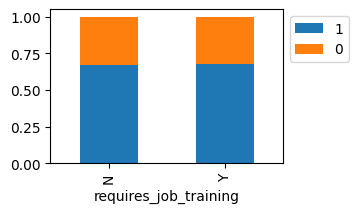

In [ ]:
stacked_barplot(data, 'requires_job_training', 'case_status');

* Requiring additional job training has no impact on case status.

##### Region of employment vs Case status

case_status               1     0    All
region_of_employment                    
All                   17018  8462  25480
Northeast              4526  2669   7195
West                   4100  2486   6586
South                  4913  2104   7017
Midwest                3253  1054   4307
Island                  226   149    375
------------------------------------------------------------------------------------------------------------------------


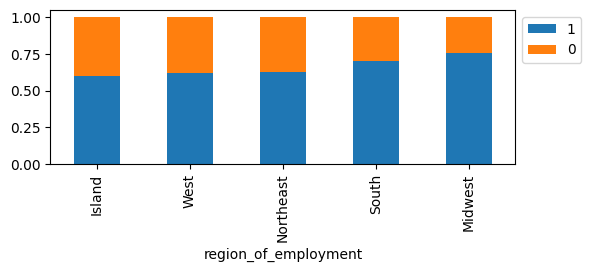

In [ ]:
stacked_barplot(data, 'region_of_employment', 'case_status');

* Island, West, and Northeast regions have similar denial rates around 38%.

##### Unit of wage vs Case status

case_status       1     0    All
unit_of_wage                    
All           17018  8462  25480
Year          16047  6915  22962
Hour            747  1410   2157
Week            169   103    272
Month            55    34     89
------------------------------------------------------------------------------------------------------------------------


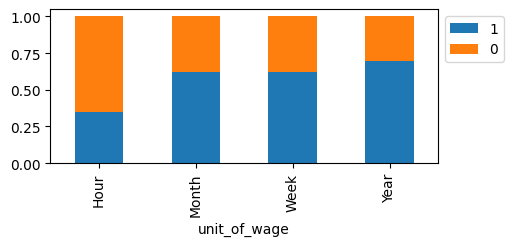

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status');

* Employees who are paid hourly have a higher rate of being denied a Visa.
* Employees on a salary/yearly wage have the lowest rate of being denied.

##### Full time position vs Case status

case_status             1     0    All
full_time_position                    
All                 17018  8462  25480
Y                   15163  7610  22773
N                    1855   852   2707
------------------------------------------------------------------------------------------------------------------------


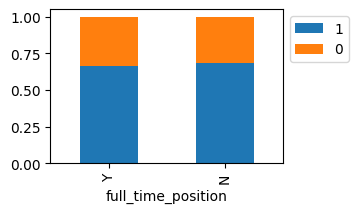

In [ ]:
stacked_barplot(data, 'full_time_position', 'case_status');

* Having a full time position has little impact on case status.

Education of employee vs Has job experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


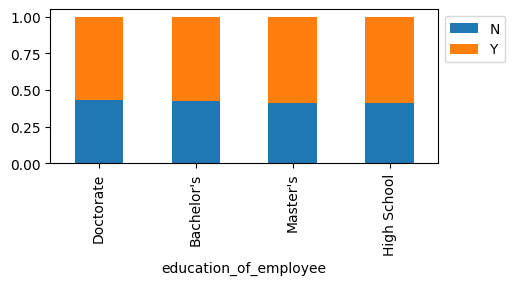

In [ ]:
stacked_barplot(data, 'education_of_employee', 'has_job_experience');

* Average of 58% of all employees have job experience.

####  

<Figure size 1500x400 with 0 Axes>

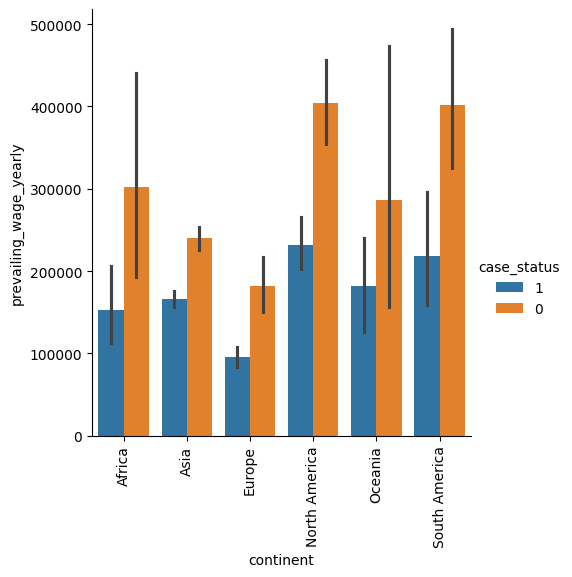

In [ ]:
plt.figure(figsize=(15,4))
sns.catplot(data, y="prevailing_wage_yearly", x="continent", hue='case_status', kind="bar")
plt.xticks(rotation=90);

* For every continent the mean prevailing wage salary is higher for visas that get denied.

### Leading Questions

####1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status                1     0    All
education_of_employee                    
All                    17018  8462  25480
Bachelor's              6367  3867  10234
High School             1164  2256   3420
Master's                7575  2059   9634
Doctorate               1912   280   2192
------------------------------------------------------------------------------------------------------------------------


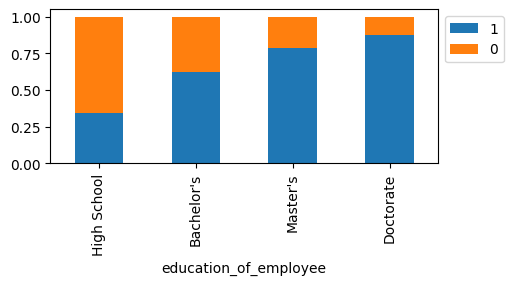

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status');

* The more education one has, the greater chance of having their visa certified.
* A high schooler has a 34% likelihood of getting certified.
* A doctorate has an 87% likelihood of getting certified.

####2. How does the visa status vary across different continents?

case_status        1     0    All
continent                        
All            17018  8462  25480
Asia           11012  5849  16861
North America   2037  1255   3292
Europe          2957   775   3732
South America    493   359    852
Africa           397   154    551
Oceania          122    70    192
------------------------------------------------------------------------------------------------------------------------


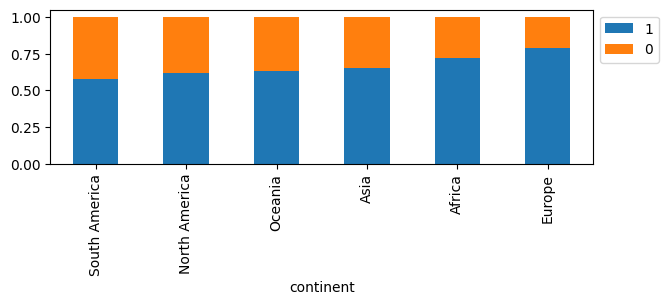

In [ ]:
stacked_barplot(data, 'continent', 'case_status');

* Asia has the highest number of applicants. ~65% are certified.
* Europe has the best rate at ~79% being certified.
* South America has the lowest rate at ~58% being certified.


#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status             1     0    All
has_job_experience                    
All                 17018  8462  25480
N                    5994  4684  10678
Y                   11024  3778  14802
------------------------------------------------------------------------------------------------------------------------


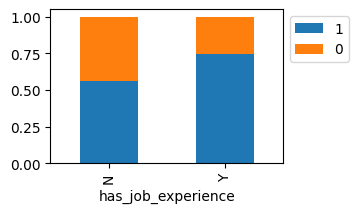

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status');

* Having work experience increases the rate of being certified by 18.3%

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status       1     0    All
unit_of_wage                    
All           17018  8462  25480
Year          16047  6915  22962
Hour            747  1410   2157
Week            169   103    272
Month            55    34     89
------------------------------------------------------------------------------------------------------------------------


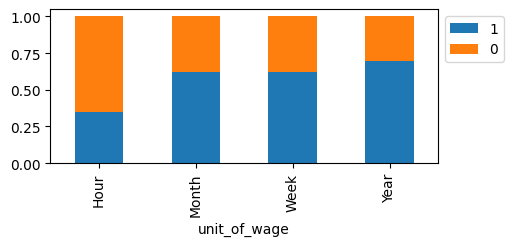

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status');

* Obtaining a yearly/salary wage has 69.8% chance of getting their visa certified.
* Monthly and weekly wages have a similar high chance too of getting certified.

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

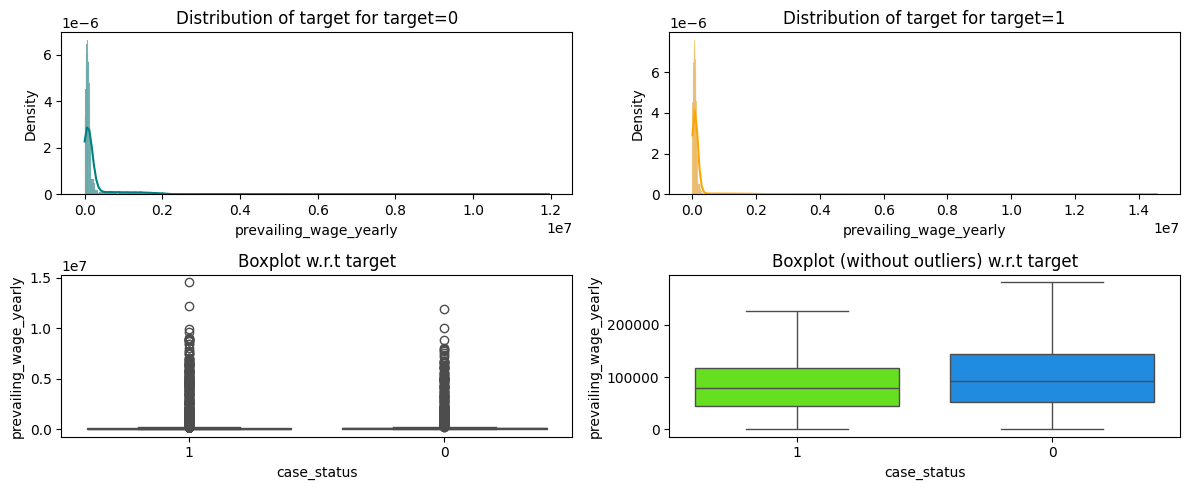

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage_yearly', 'case_status');

* * A higher prevailing wage for similar workers have higher rate of having a visa denied.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment (if needed)

In [ ]:
data.isnull().sum()

continent                 0
education_of_employee     0
has_job_experience        0
requires_job_training     0
no_of_employees           0
yr_of_estab               0
region_of_employment      0
unit_of_wage              0
full_time_position        0
case_status               0
prevailing_wage_yearly    0
dtype: int64

* No missing values

### Feature engineering

None required.

### Outlier detection and treatment (if needed)

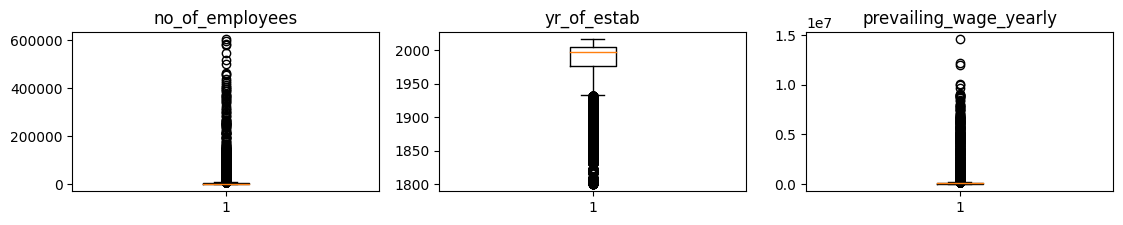

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* `yr_of_estab` outliers are proper values and will not treat.
* `no_of_employees` will treat, cannot be negative.

In [ ]:
data[['no_of_employees', 'prevailing_wage_yearly']].describe()

,no_of_employees,prevailing_wage_yearly
count,25480.000000,2.548000e+04
mean,5667.043210,1.973912e+05
std,22877.928848,5.785917e+05
min,-26.000000,1.000000e+02
25%,1022.000000,4.710796e+04
50%,2109.000000,8.283946e+04
75%,3504.000000,1.248250e+05
max,602069.000000,1.456915e+07


**** Treat negative no_of_employees ****

In [ ]:
# how many have no_of_employees as negative value
negative_employees=data[data['no_of_employees']<0].value_counts().sum()
negative_employees

33

In [ ]:
# impute if negative number of employees with the absolute value
data['no_of_employees']=data['no_of_employees'].agg(abs)

In [ ]:
# recheck how many have no_of_employees as negative value
negative_employees=data[data['no_of_employees']<0].value_counts().sum()
negative_employees

0

**** Treat prevailing_wage_yearly ****

In [ ]:
# to find the 25th percentile and 75th percentile for columns.
Q1=data['prevailing_wage_yearly'].quantile(0.25)
Q3=data['prevailing_wage_yearly'].quantile(0.75)

#Inter Quantile Range (75th percentile - 25th percentile. All values outside these bounds are outliers
IQR=Q3-Q1
lower_whisker = Q1 - 1.5 * (IQR)
upper_whisker=Q3+1.5*(IQR)

#percentage of outliers in column
(data['prevailing_wage_yearly']>upper_whisker).sum()/(data['prevailing_wage_yearly'].count())*100

9.368131868131869

* 9.3% is a high amount of outliers. We will keep the values and

### Preparing data for modeling

In [ ]:
# specifying the independent and dependent variables
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

In [ ]:
# dataset with dummy variables
X.head()

,no_of_employees,yr_of_estab,prevailing_wage_yearly,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513.0,2007.0,1231782.032,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2412.0,2002.0,83425.650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,44444.0,2008.0,122996.860,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,98.0,1897.0,83434.030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1082.0,2005.0,149907.390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# distribution of target variable in original dataset
y.value_counts(1)

case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64

In [ ]:
# distribution of target variable in train dataset
y_train.value_counts(1)

case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64

In [ ]:
# distribution of target variable in test dataset
y_test.value_counts(1)

case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64

* We see that appx ~67% of visas are certified and ~33% of bookings are canceled. This is preserved in the train and test sets.

## Recheck EDA
* good to do since we manipulated some **data**

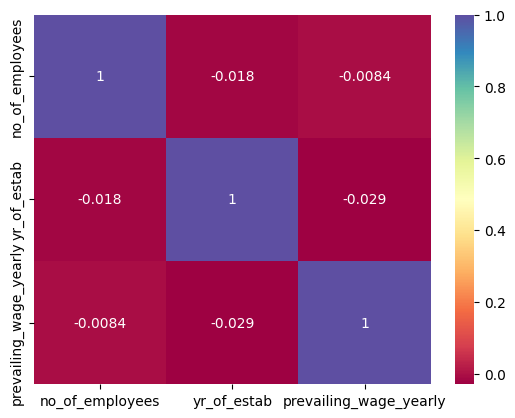

In [ ]:
sns.heatmap(numeric_cols.corr(),annot=True,cmap='Spectral');

* Correlation remains similar to original.

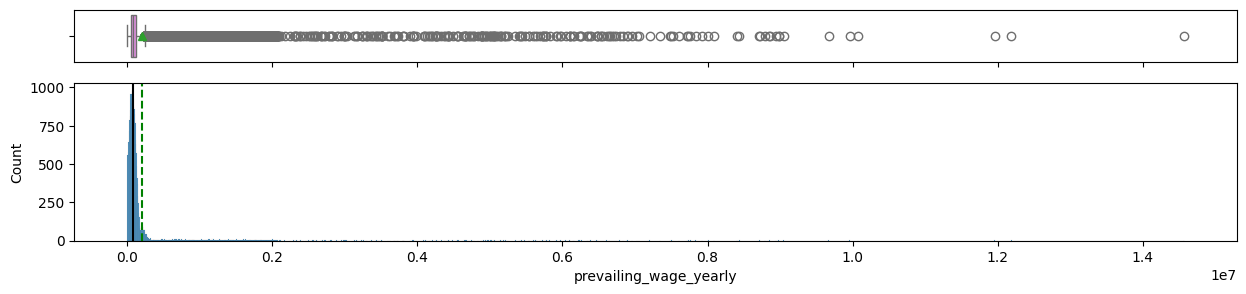

In [ ]:
histogram_boxplot(data, 'prevailing_wage_yearly');

## Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting an employee applicant will have their visa approved when it should have been denied.
2. Predicting an employee applicant will have their visa denied when it should have been approved.

#### Which case is more important?
* Both of the cases are important.
    * Predicting an employee will have their visa approved when it should've been denied will cause individuals to be working in the USA who should not be here. Thus a loss of a position for a citizen of the USA.
    * Predicting an employee will have their visa denied when it should've been approved will cause a loss of quality laborers for the economy.

#### How to reduce this loss i.e need to reduce False Negatives and False Positive?
* We want the f1 score to be maximized, greater the f1 score results in  minimizing false negatives and false positives.

## Decision Tree Model Building

**Let's define function to provide metric scores(accuracy, recall, precision, and F1 score) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# function to create the confusion matrix

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model (no weighting)

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [ ]:
# fitting the model
dtree = DecisionTreeClassifier(criterion='gini', random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy   Recall  Precision        F1
0  0.658556  0.74143   0.745813  0.743615


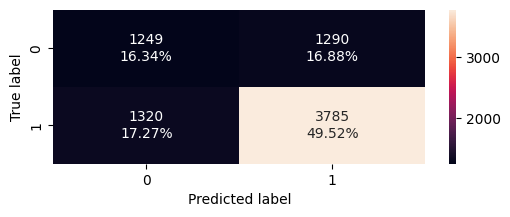

In [ ]:
# calculate performance values for train set
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

# calculate performance values for test set
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(dtree, X_test, y_test)

**Confusion Matrix Explained -**

* Individual was predicted to get a visa and did get a visa:  True Positive (observed=1,predicted=1)

* Individual was predicted to get a visa but was denied: False Positive (observed=0,predicted=1)

* Individual was predicted to get denied for a visa and did get denied for a visa: True Negative(observed=0,predicted=0)

* Individual was predicted to get denied for a visa but was approved: False Negative (observed=1,predicted=0)

Decision Tree  w/o Weighting Model Takeaway:
* The decision tree is overfitting the training data and is capturing all the noise. This is normal for a decision treeD.
* The test F1 Score is acceptable at predicting 74% of approved visas.

### Decision Tree Model(with weighting)

In [ ]:
# find distribution for dependent variable
data['case_status'].value_counts(normalize=True)

case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64

Because the dependent varaiable is not balanced, 1 - 67% vs 0 - 33%, we will add balanced weighting. Achieving higher F1 score than doing `class_weight={0:0.33, 1:0.668}`



In [ ]:
# fitting the model with class weighting
dtree_wt = DecisionTreeClassifier(criterion='gini', class_weight='balanced', random_state=1)
dtree_wt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.656463  0.748874   0.739888  0.744354


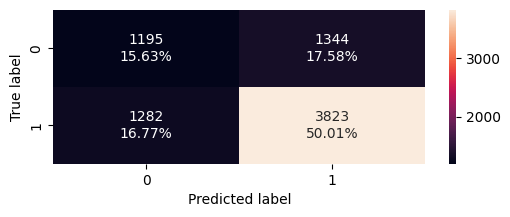

In [ ]:
# calculate performance values for train set
dtree_model_wt_train_perf=model_performance_classification_sklearn(dtree_wt, X_train, y_train)
print("Training performance \n",dtree_model_wt_train_perf)

# calculate performance values for test set
dtree_model_wt_test_perf=model_performance_classification_sklearn(dtree_wt, X_test, y_test)
print("Testing performance \n",dtree_model_wt_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(dtree_wt, X_test, y_test)


Decision Tree with Weighting Model Takeaway:
* A very slight decrease in F1 score.
* Still overfitting on the train data.

### Tuning Decision Tree Model

Tried the parameters of:

    'max_depth': np.arange(2,14),
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes' : [2, 3, 5, 10,15],
    'min_impurity_decrease': [0.0001,0.001,0.01,0.1]

And the best model is shown below.

In [ ]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.33, 1:0.668},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [9],
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [15],
              'min_impurity_decrease': [0.0001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.668}, max_depth=9,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.728919  0.937044   0.732096  0.821987
Testing performance 
    Accuracy    Recall  Precision      F1
0  0.723443  0.937512   0.727245  0.8191


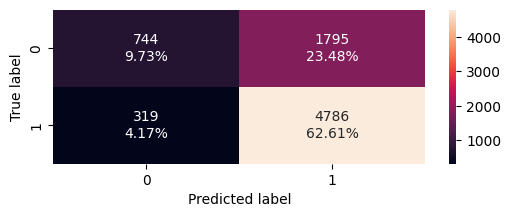

In [ ]:
# calculate performance values for train set
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_tuned_model_train_perf)

# calculate performance values for test set
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned, X_test, y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(dtree_tuned,X_test,y_test)

Tuned Decision Tree Model Takeaways:
* Model is generalizing well. Model is able to predict 82% of visa case status.





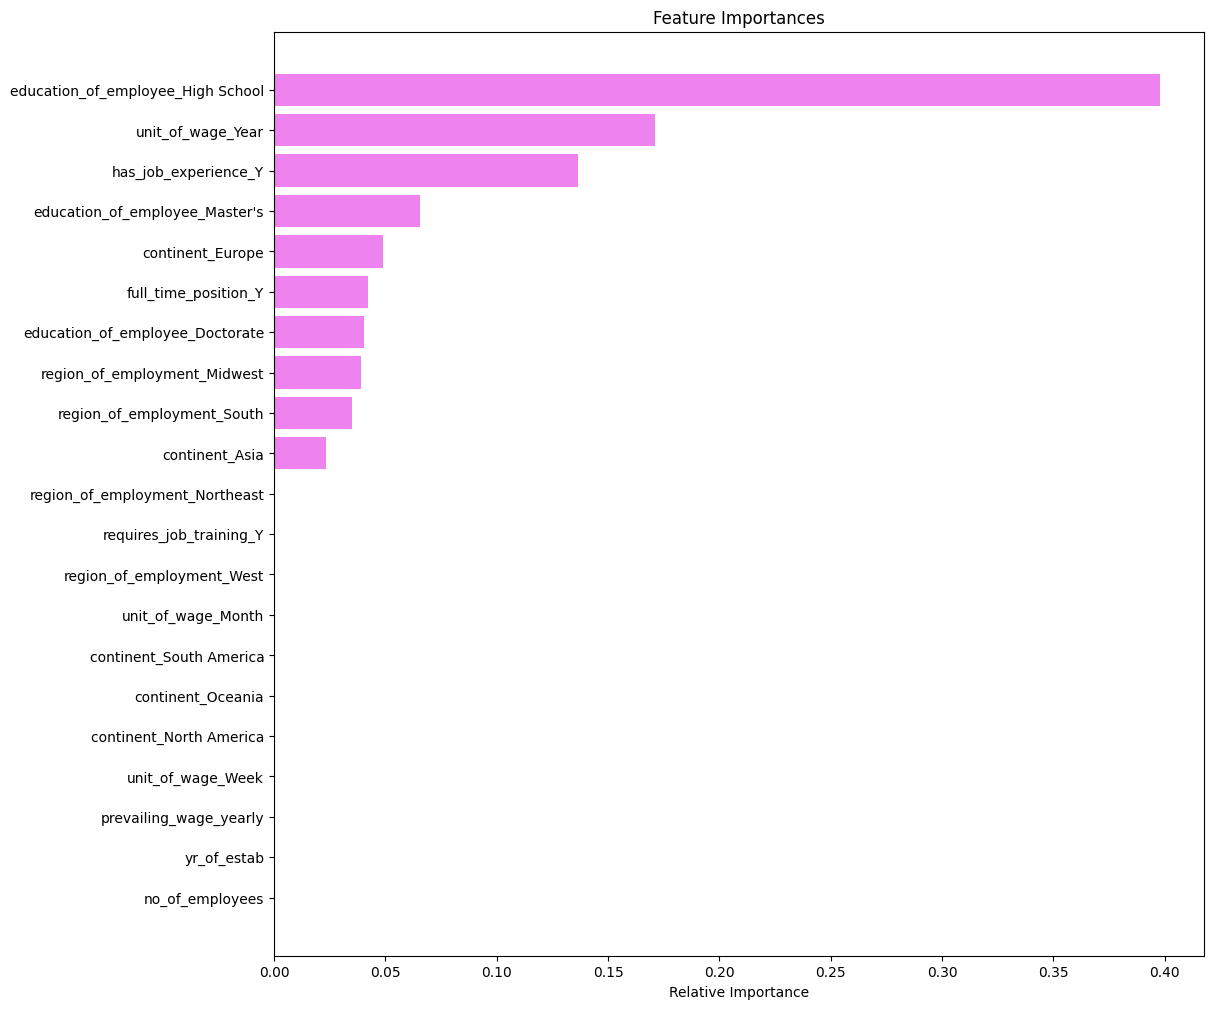

In [ ]:
# Feature importance of best decision tree model, tuned decision tree
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for being approved for a visa is having a high school education, a yearly unit of wage, and having job experience.

## Bagging Model Building

### Bagging Classifier Model Building (no weighting)

In [ ]:
# fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985086  0.986066   0.991559  0.988805
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.689037  0.765328   0.768187  0.766755


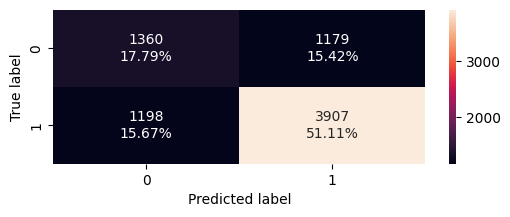

In [ ]:
# calculate performance values for train set
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

# calculate performance values for test set
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(bagging, X_test, y_test)


Bagging Model  w/o Weighting Takeaway:
* The F1 score has slightly decreased, although it is still overfitting on the train dataset.
* Other metrics have all increased.

### Bagging Classifier Model Building (with weighting)

In [ ]:
# fitting the model with class weighting
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984918  0.987325   0.990067  0.988694
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.697933  0.783937   0.768433  0.776108


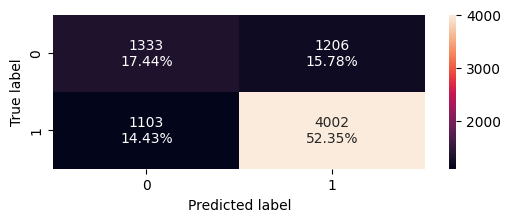

In [ ]:
# calculate performance values for train set
bagging_model_wt_train_perf=model_performance_classification_sklearn(bagging_wt, X_train, y_train)
print("Training performance \n",bagging_model_wt_train_perf)

# calculate performance values for test set
bagging_model_wt_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_model_wt_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(bagging_wt, X_test, y_test)


 Bagging Classifier w/Weighting Model Takeaway:
 * F1 Score dropped slighting when we added balanced weighting.

### Tuning Bagging Classifier Model

Tried the parameters of:

    'base_estimator':[cl1],
    'n_estimators':[5,15,51,75,101],
    'max_features': [0.7,0.8,0.9,1]

And the best model is shown below.

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.3,1:0.668},random_state=1)
parameters = {'base_estimator':[cl1],
              'n_estimators':[101],
              'max_features': [0.7]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), parameters, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_tuned  = grid.best_estimator_
bagging_tuned.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.668},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance 
    Accuracy    Recall  Precision       F1
0  0.722789  0.887953   0.745559  0.81055


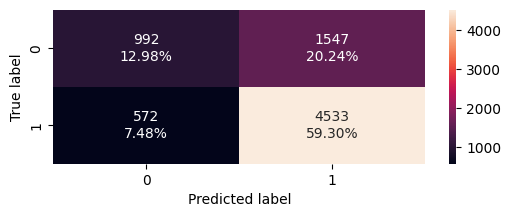

In [ ]:
# calculate performance values for train set
bagging_tuned_model_train_perf=model_performance_classification_sklearn(bagging_tuned, X_train,y_train)
print("Training performance \n",bagging_tuned_model_train_perf)

# calculate performance values for test set
bagging_tuned_model_test_perf=model_performance_classification_sklearn(bagging_tuned, X_test, y_test)
print("Testing performance \n",bagging_tuned_model_test_perf)

# create confusion matrix for test set
confusion_matrix_sklearn(bagging_tuned, X_test,y_test)

Tuned Bagging Classifier Model Takeaways:
* Model is less overfitting. F1 Score is predicting 81% accuracy of visa status.
* Recall is at 100% for both train and test. Accuracy and precision decrease from last model.

### Random Forest Model Building (no weighting)

In [ ]:
# fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722658  0.834672    0.76955  0.800789


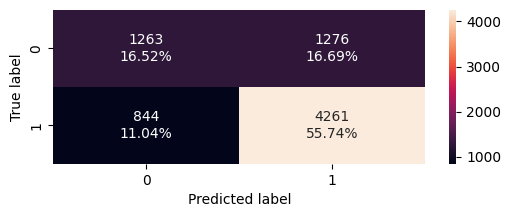

In [ ]:
# calculate performance values for train set
rf_model_train_perf=model_performance_classification_sklearn(rf, X_train, y_train)
print("Training performance \n",rf_model_train_perf)

# calculate performance values for test set
rf_model_test_perf=model_performance_classification_sklearn(rf, X_test, y_test)
print("Testing performance \n",rf_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(rf,X_test,y_test)

Random Forest w/o Weighting Model Takeaway:
* Still somewhat overfitting, again the F1 score has increased.
* Other metrics have also increased again!

### Random Forest Model Building (with weighting)

In [ ]:
# fitting the model with class weighting
rf_wt = RandomForestClassifier(class_weight={0:0.33, 1:0.668}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.668}, random_state=1)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71978  0.825661    0.77099  0.797389


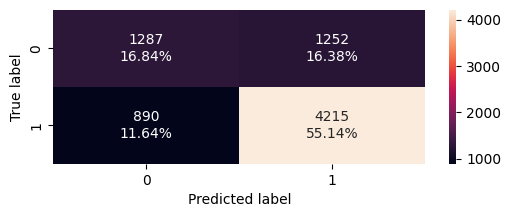

In [ ]:
# calculate performance values for train set
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train, y_train)
print("Training performance \n",rf_wt_model_train_perf)

# calculate performance values for test set
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test, y_test)
print("Testing performance \n",rf_wt_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(rf_wt,X_test,y_test)

Random Forest w/Weighting Model Takeaway:
* With and without weighting have similar F1 Score.

### Tuning Random Forest Model

Tried the parameters of:

    "n_estimators": np.arange(20, 140, 40),
    "min_samples_leaf": np.arange(1, 8, 1),
    "max_features": [0.7,0.9,'log2','auto'],
    "max_depth": list(np.arange(5, 15, 5))

And the best model is shown below.

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid of parameters to choose from
parameters = {
        "n_estimators": np.arange(20, 140, 40),
        "min_samples_leaf": [5],
        "max_features": ['log2'],
        "max_depth": [10],
}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       oob_score=True, random_state=1)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.765979  0.897003   0.783833  0.836608
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742282  0.882076    0.76699  0.820517


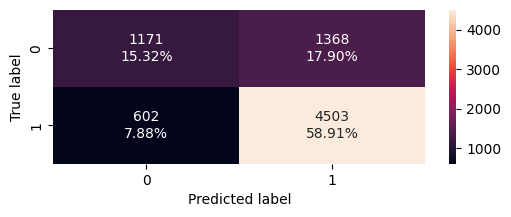

In [ ]:
# calculate performance values for train set
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

# calculate performance values for test set
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

# create confusion matrix on test
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

Tuned Random Forest Model Takeaways:
* Well fitting model, F1 score is predicting correctly on 81.9% on test data.  

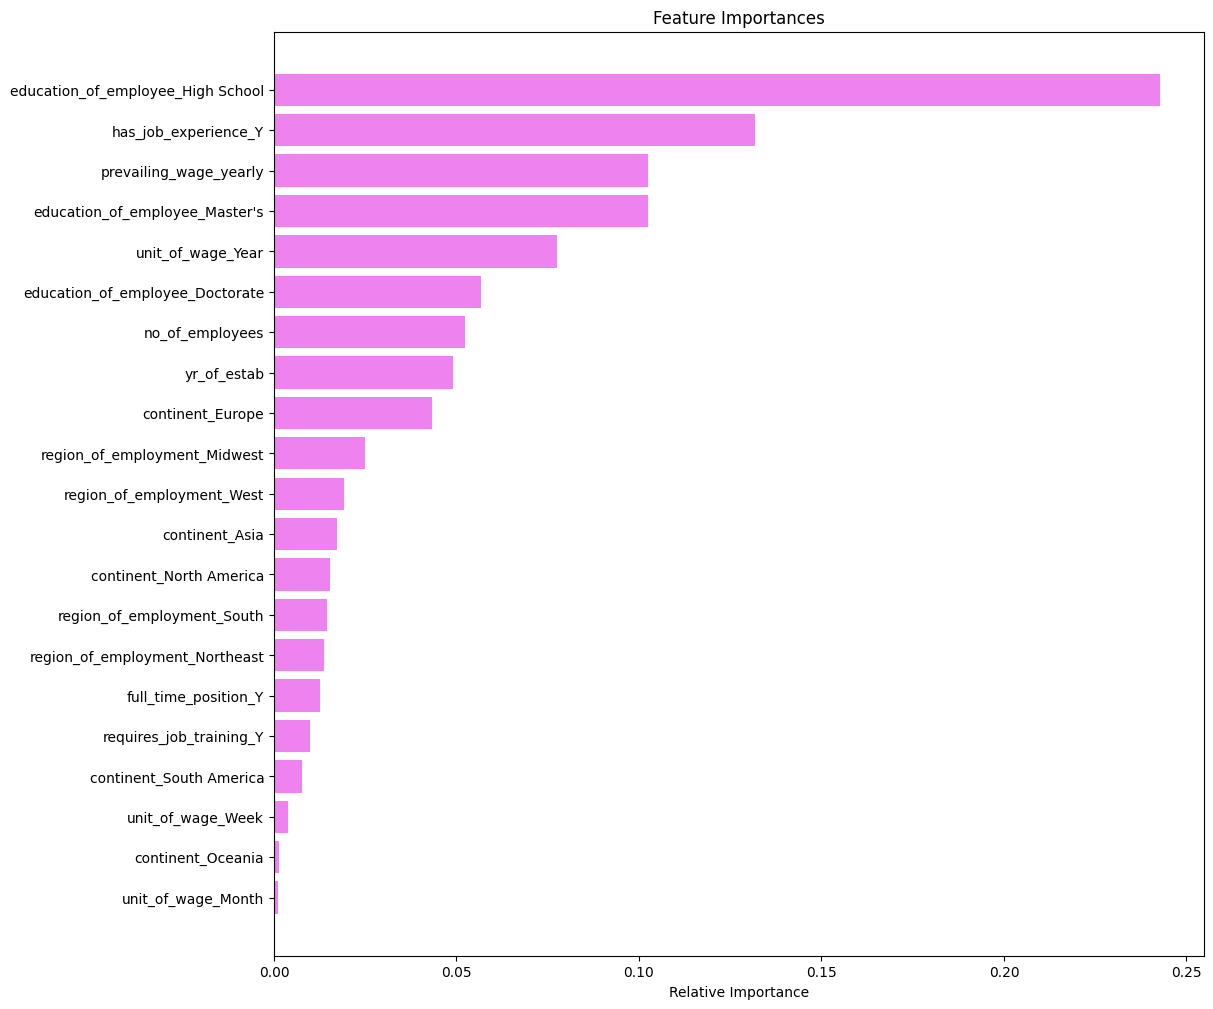

In [ ]:
# Feature importance of best random forest model, tuned random forest
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for being approved for a visa is having a high school education, having job experience, and the prevailing yearly wage.

## Boosting Model Building

### AdaBoost Classifier

   Accuracy  Recall  Precision       F1
0  0.739235  0.8897   0.760548  0.82007
   Accuracy    Recall  Precision        F1
0  0.734171  0.886582   0.756983  0.816673


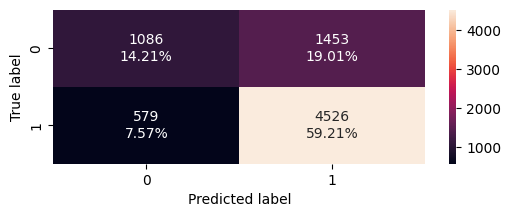

In [ ]:
#Fitting the model to train data
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

AdaBoost Classifier Model Takeaways:
* Well fitting model, F1 score is predicting correctly on 81.9% on test data.  

### Hyperparameter Tuning - Ada Boost

Tried the parameters of:

    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClass(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)

And the best model is shown below.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=3)],
    "n_estimators": [60],
    "learning_rate":[0.1]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the train data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=60, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754149  0.885587   0.777336  0.827938
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.740188  0.878746   0.766445  0.818763


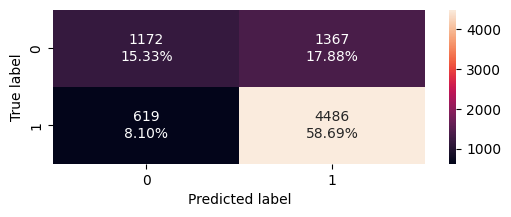

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Tuned AdaBoost Classifier Model Takeaways:
* The hypertuned AdaBoost model is better fitting than the previous AdaBoost model. So far, this is the best fitted model.

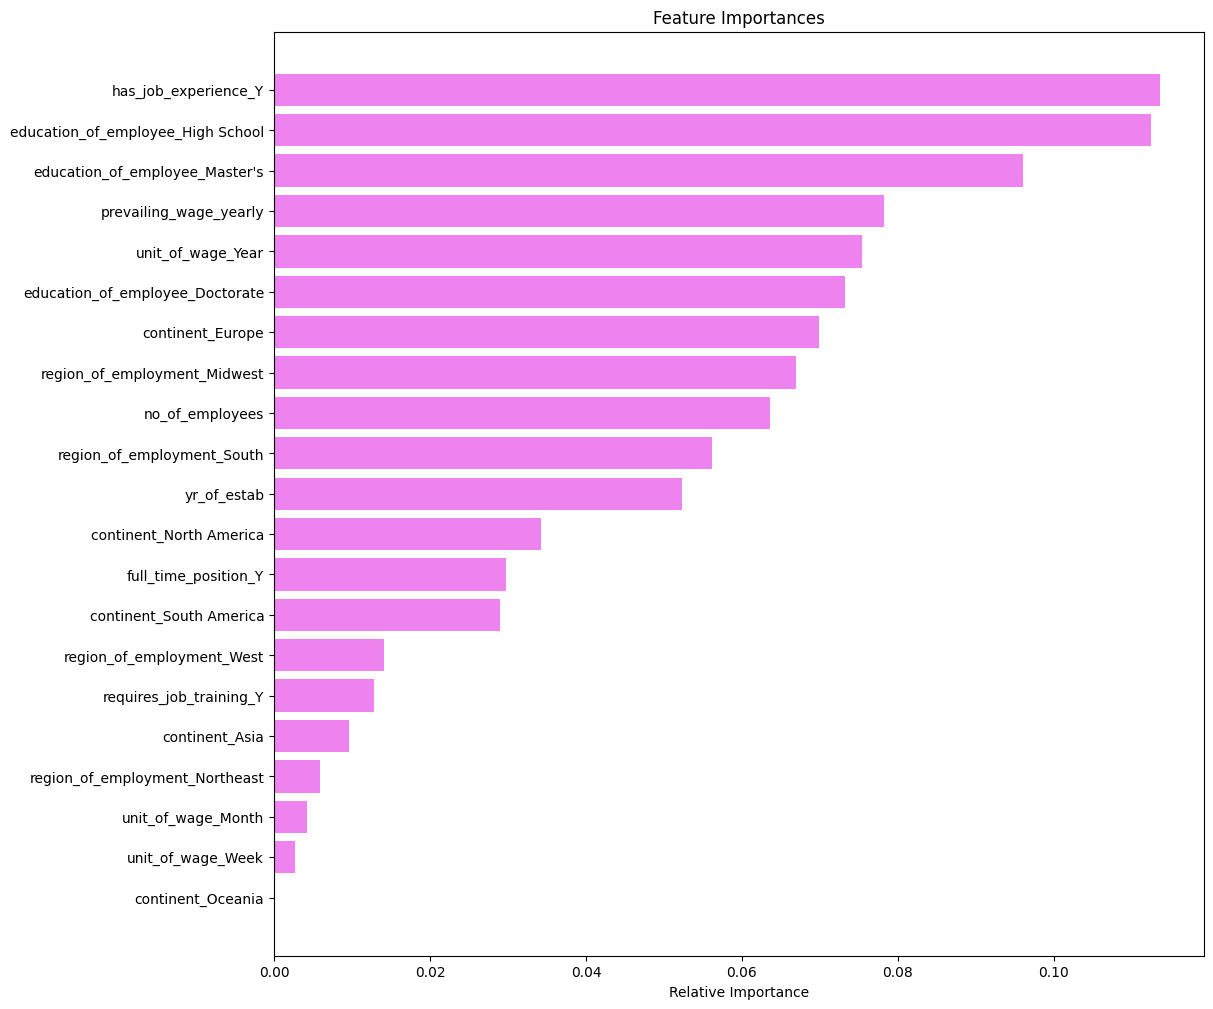

In [ ]:
# Feature importance of best random forest model, tuned random forest
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The top 3 features are the same as the tuned decision tree model.

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757233  0.880802   0.782884  0.828962
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.744375  0.87522   0.772342  0.820569


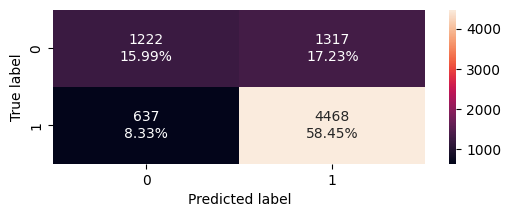

In [ ]:
#Fitting the model to train data
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix for test data
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Gradient Boosting Classifier Model Takeaways:
* Another well fitting model, with an F1 score of 82% for test and train.

### Hyperparameter Tuning - Gradient Boosting

Tried the parameters of:

    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]

And the best model is shown below.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8],
    "max_features":[0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757176  0.877193   0.784652  0.828346
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.742543  0.86954    0.77321  0.818551


Tuned Gradient Boosting Classifier Model Takeaways:
* No improvement with hypertuning. Same results without the intial estimator of AdaBoost.

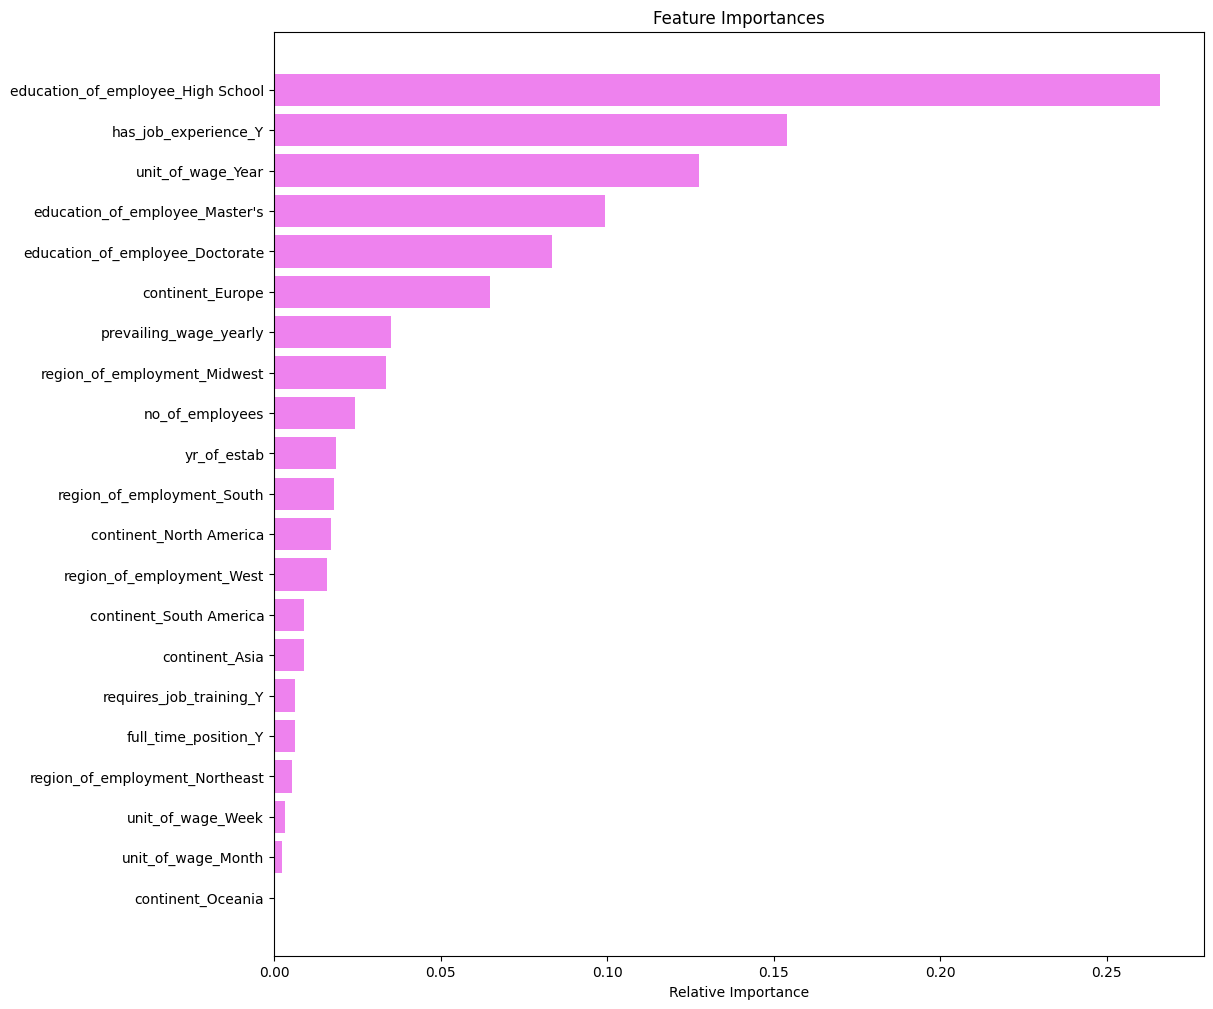

In [ ]:
# Feature importance of best random forest model, tuned random forest
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Same top 3 features as tuned AdaBoost model and in the same order.
* Also same general top 3 features as tuned decision tree model.

### XGBoost Classifier (can skip if having time complexity issues)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.84094  0.929992   0.846889  0.886497
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72933  0.852693   0.767725  0.807981


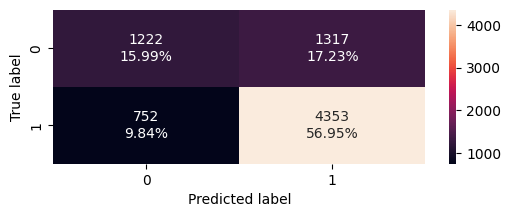

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

XGBoost Classifier Model Takeaways:
* Slightly overfitting model.

### Hyperparameter Tuning - XGBoost

Tried the parameters of:

    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]

And the best model is shown below.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the train data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.761718  0.895492   0.780224  0.833894
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744244  0.884427   0.767857  0.82203


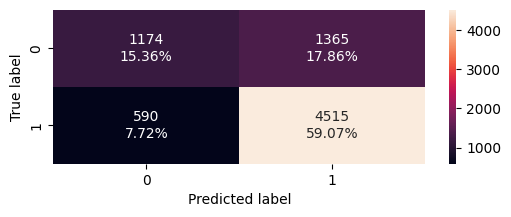

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned ,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned ,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned ,X_test,y_test)

Tuned XGBoost Classifier Model Takeaways:
* Tuning improved the performance. A nicely fitted model that is performing well at predicting 82% of results.

## Stacking Model Building

In [ ]:
# models to utilize for stacking
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('XG Boost', xgb_tuned)]

# Choose the type of classifier.
final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

# Fit the best algorithm to the data.
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='log2',
                                                       min_samples_leaf=5,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('XG Boost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbac...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0   0.76155  0.891379   0.782074  0.833157
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743197  0.880313   0.768731  0.820747


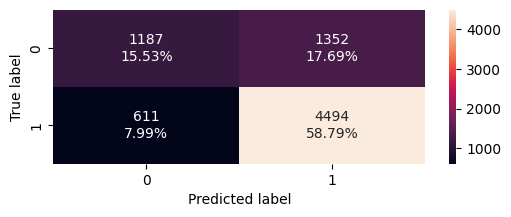

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

Stacking Model Takeaways:
* A slightly overfit model. High F1 score, but other models had higher performance.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance values for all models
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_model_wt_train_perf.T, dtree_tuned_model_train_perf.T,
     bagging_model_train_perf.T, bagging_model_wt_train_perf.T, bagging_tuned_model_train_perf.T,
     rf_model_train_perf.T,rf_wt_model_train_perf.T, rf_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T, abc_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T, gbc_tuned_model_train_perf.T,
     xgb_classifier_model_train_perf.T, xgb_tuned_model_train_perf.T,
     stacking_classifier_model_train_perf.T],
    axis=1)

# column labels
models_train_comp_df.columns = [
    "Decision Tree", "Weighted Decision Tree", "Decision Tree Tuned",
    "Bagging Classifier", "Weighted Bagging Classifier", "Bagging Tuned",
    "Random Forest Classifier", "Weighted Random Forest Classifier", "Random Forest Tuned",
    "AdaBoost Classifier", "AdaBoost Classifier Tuned",
    "Gradient Boosting Classifier", "Gradient Boosting Classifier Tuned",
    "XGBoost Classifier", "XGBoost Tuned",
    "Stacking"]

In [ ]:
# testing performance values for all models
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_model_wt_test_perf.T, dtree_tuned_model_test_perf.T,
     bagging_model_test_perf.T, bagging_model_wt_test_perf.T, bagging_tuned_model_test_perf.T,
     rf_model_test_perf.T,rf_wt_model_test_perf.T, rf_tuned_model_test_perf.T,
     ab_classifier_model_test_perf.T, abc_tuned_model_test_perf.T,
     gb_classifier_model_test_perf.T, gbc_tuned_model_test_perf.T,
     xgb_classifier_model_test_perf.T, xgb_tuned_model_test_perf.T,
     stacking_classifier_model_test_perf.T],
    axis=1)

# column labels
models_test_comp_df.columns = [
    "Decision Tree", "Weighted Decision Tree", "Decision Tree Tuned",
    "Bagging Classifier", "Weighted Bagging Classifier", "Bagging Tuned",
    "Random Forest Classifier", "Weighted Random Forest Classifier", "Random Forest Tuned",
    "AdaBoost Classifier", "AdaBoost Classifier Tuned",
    "Gradient Boosting Classifier", "Gradient Boosting Classifier Tuned",
    "XGBoost Classifier", "XGBoost Tuned",
    "Stacking"]

In [ ]:
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Weighted Decision Tree,Decision Tree Tuned,Bagging Classifier,Weighted Bagging Classifier,Bagging Tuned,Random Forest Classifier,Weighted Random Forest Classifier,Random Forest Tuned,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boosting Classifier,Gradient Boosting Classifier Tuned,XGBoost Classifier,XGBoost Tuned,Stacking
Accuracy,1.0,1.0,0.728919,0.985086,0.984918,0.999944,0.999944,1.0,0.765979,0.739235,0.754149,0.757233,0.757176,0.840940,0.761718,0.761550
Recall,1.0,1.0,0.937044,0.986066,0.987325,1.000000,0.999916,1.0,0.897003,0.889700,0.885587,0.880802,0.877193,0.929992,0.895492,0.891379
Precision,1.0,1.0,0.732096,0.991559,0.990067,0.999916,1.000000,1.0,0.783833,0.760548,0.777336,0.782884,0.784652,0.846889,0.780224,0.782074
F1,1.0,1.0,0.821987,0.988805,0.988694,0.999958,0.999958,1.0,0.836608,0.820070,0.827938,0.828962,0.828346,0.886497,0.833894,0.833157


In [ ]:
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Weighted Decision Tree,Decision Tree Tuned,Bagging Classifier,Weighted Bagging Classifier,Bagging Tuned,Random Forest Classifier,Weighted Random Forest Classifier,Random Forest Tuned,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boosting Classifier,Gradient Boosting Classifier Tuned,XGBoost Classifier,XGBoost Tuned,Stacking
Accuracy,0.658556,0.656463,0.723443,0.689037,0.697933,0.722789,0.722658,0.719780,0.742282,0.734171,0.740188,0.744375,0.742543,0.729330,0.744244,0.743197
Recall,0.741430,0.748874,0.937512,0.765328,0.783937,0.887953,0.834672,0.825661,0.882076,0.886582,0.878746,0.875220,0.869540,0.852693,0.884427,0.880313
Precision,0.745813,0.739888,0.727245,0.768187,0.768433,0.745559,0.769550,0.770990,0.766990,0.756983,0.766445,0.772342,0.773210,0.767725,0.767857,0.768731
F1,0.743615,0.744354,0.819100,0.766755,0.776108,0.810550,0.800789,0.797389,0.820517,0.816673,0.818763,0.820569,0.818551,0.807981,0.822030,0.820747


* The highest f1 score is on the gradient boosting classifier model.
* Other top performing models are the random forest tuned model(best fitting) and AdaBoost classifier tuned model.  

### Feature importance of Tuned Random Forest

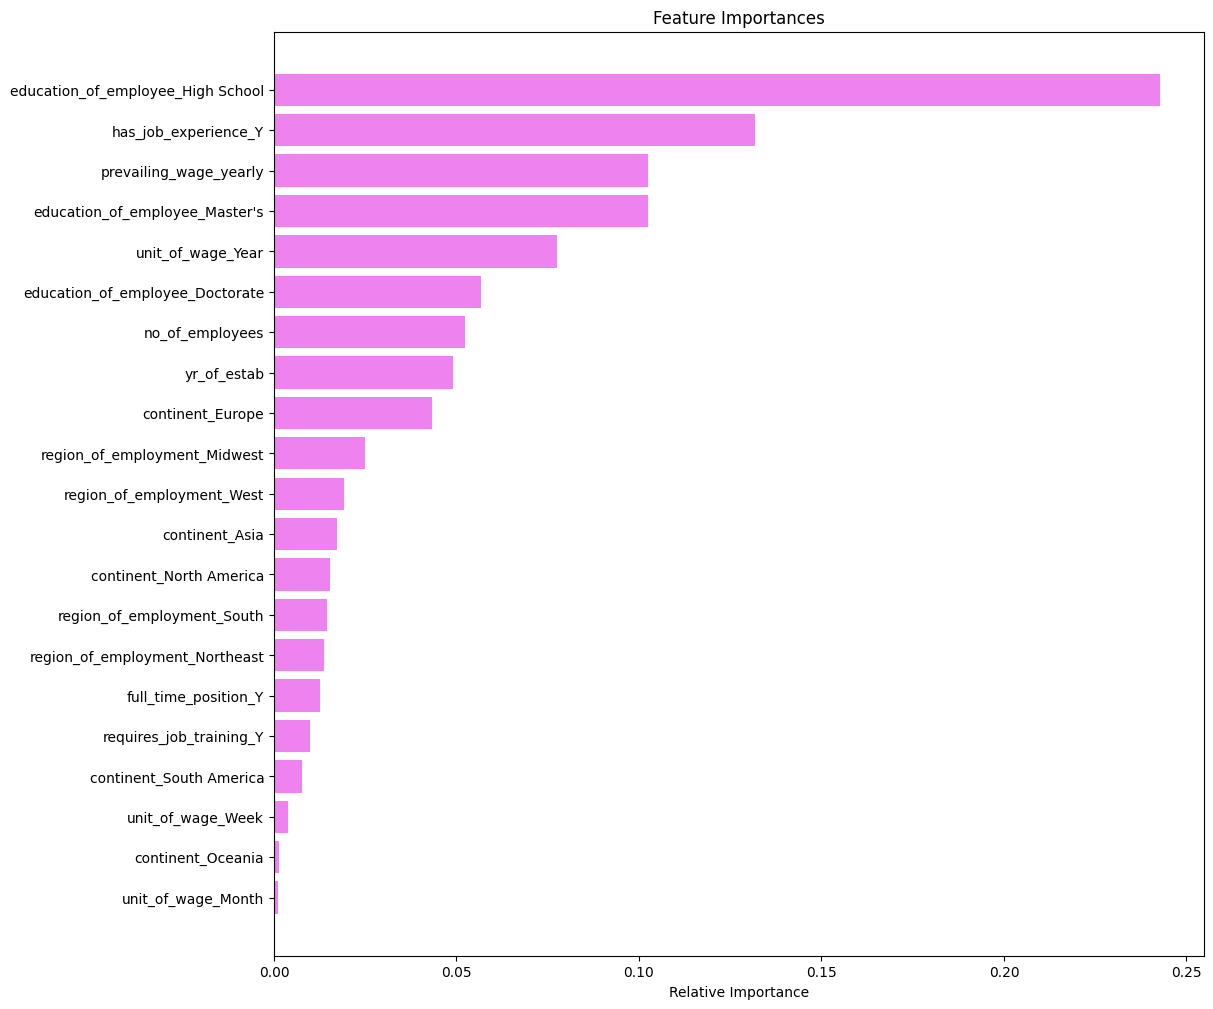

In [ ]:
# graph feature importance values
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The most important features for being approved for a visa is if the applicant has a high school education.  

## Actionable Insights and Recommendations

* The Office of Foreign Labor Certification (OFLC) can use
 desired model to identify cases that will be approved or denied based on the factors that
  influence the individual's case status. The goal was to minimize predictions where

    *   An applicant will have their visa approved when it should've been denied.
    *   An applicant will have their visa denied when it should've been approved.

* Based on our analysis, we can create a profile of factors held by applicants who are predicted to be approved for a visa in comparison to being denied:
  * Having only a high school education will significantly reduce one's chance of being approved. A master's degree or doctorate improves your chance of being approved.
  * Having prior job experience
  * Lower yearly prevailing job wages
  * Having a wage computed on a yearly basis
  * Being at a larger company with more employees.
  * Applicants from Europe have a higher approval of their visas.
  * Placement in the midwest region has higher approval of visas.
* Applicants from South America have the least approvals of their visas.
* Placement in the west and island regions have the lowest visa approval.
* The age of a company does not have an impact on case status.

* Sugestion to implement a fast track visa approval department for applicants possessing the favorable traits. This will benefit our economy by bringing in valuable workers in a quick and efficient manner.

